In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

working_directory = os.getcwd()
print(working_directory)

/Users/zichang/Desktop


In [36]:
# Load dataset
file_path = working_directory + '/creditcard.csv'
df = pd.read_csv(file_path)

In [37]:
# Display basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [38]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [39]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


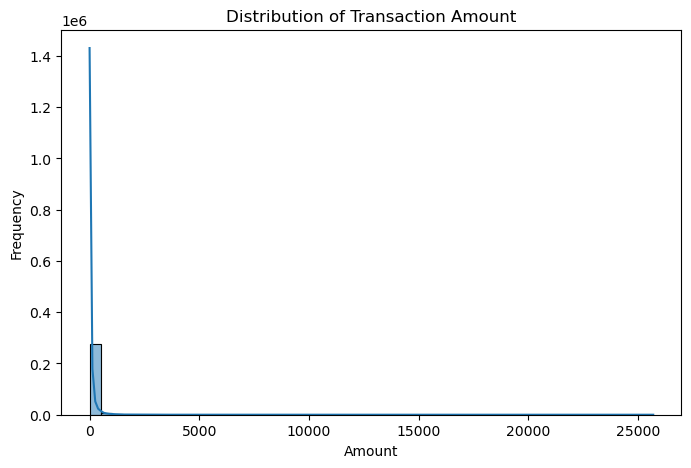

In [40]:
# Visualizing the distribution of the 'Amount' column
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

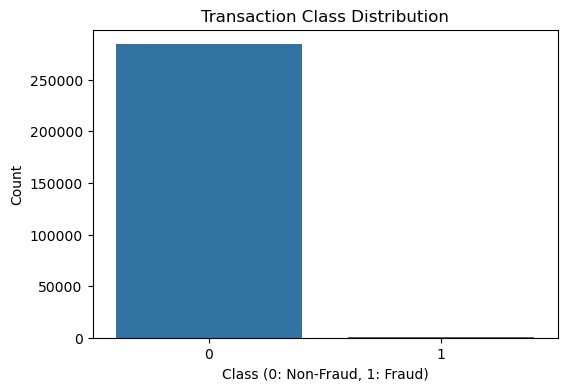

In [41]:
# Checking the class distribution (fraud vs. non-fraud)
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df)
plt.title("Transaction Class Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

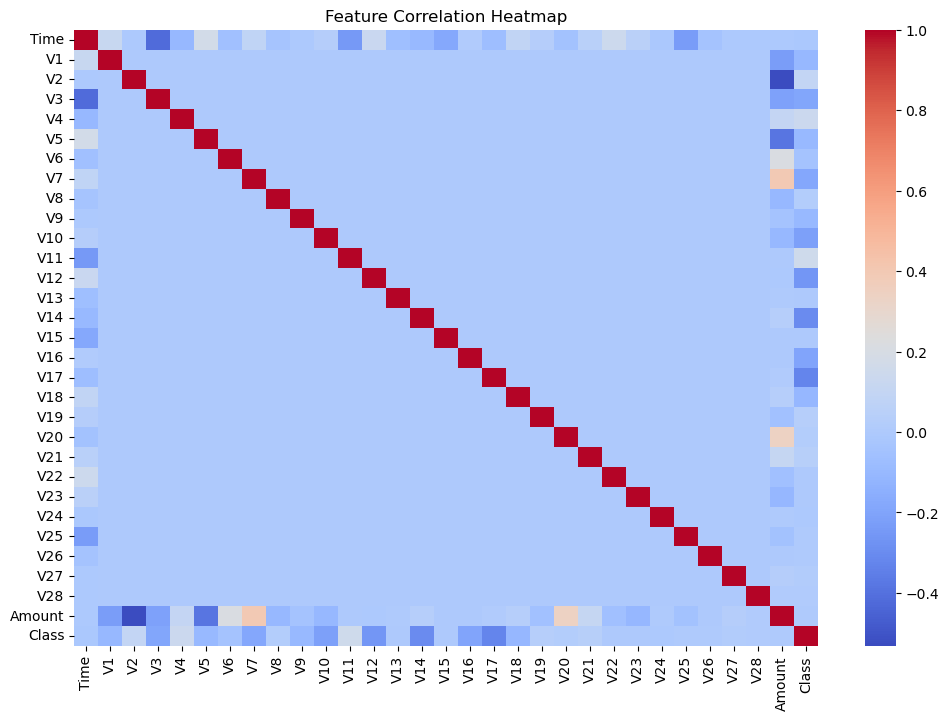

In [42]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

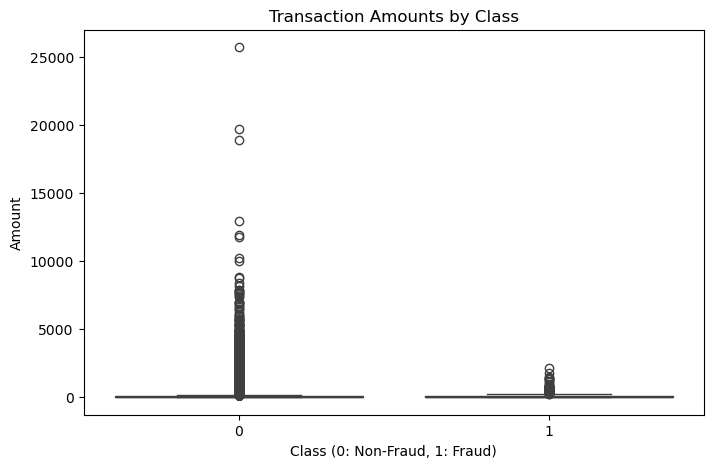

In [43]:
# Box plot for transaction amounts across fraud/non-fraud classes
plt.figure(figsize=(8, 5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amounts by Class")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Amount")
plt.show()

In [44]:
# Separate features and target variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target

In [51]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Define multiple neural network architectures
def create_model(layers=[64, 32], activation="relu"):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))
    
    for layer_size in layers:
        model.add(keras.layers.Dense(layer_size, activation=activation))
    
    model.add(keras.layers.Dense(1, activation="sigmoid"))  # Binary classification output
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    
    return model

In [61]:
# Train and evaluate models
architectures = [
    {"name": "Model_1", "layers": [64, 32], "activation": "relu"},
    {"name": "Model_2", "layers": [128, 64, 32], "activation": "relu"},
    {"name": "Model_3", "layers": [32], "activation": "relu"}
]

results = []
for arch in architectures:
    model = create_model(layers=arch["layers"], activation=arch["activation"])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        "Model": arch["name"],
        "Accuracy": accuracy,
        "F1-score": f1,
        "AUC": auc
    })

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


In [62]:
# Display results
results_df = pd.DataFrame(results)
print(results_df)

     Model  Accuracy  F1-score       AUC
0  Model_1  0.999280  0.757396  0.826469
1  Model_2  0.999315  0.763636  0.821393
2  Model_3  0.999456  0.834225  0.897862
